In [ ]:
import numpy as np # linear algebra
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
import nltk
import re
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Book1.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install stopwords

In [ ]:
!pip install nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df.head()

,Column1,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [ ]:
columns=df.columns
columns

Index(['Column1', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects',
       'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview'],
      dtype='object')

<Axes: title={'center': 'percentage rating of drugs'}, ylabel='Counts'>

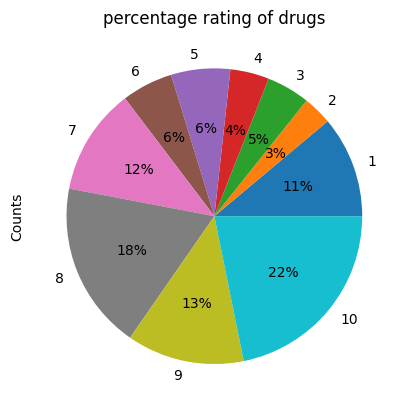

In [ ]:
df.groupby(['rating']).size().plot(kind='pie',ylabel='Counts', autopct='%1.0f%%', title='percentage rating of drugs')

In [ ]:
#lowercasing first 10 texts
df['commentsReview'] = df['commentsReview'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['commentsReview'] = df['commentsReview'].str.replace('[^\w\s]',"")
df.commentsReview

<ipython-input-15-b306ee4925a6>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['commentsReview'] = df['commentsReview'].str.replace('[^\w\s]',"")


0       took the antibiotics for 14 days sinus infecti...
1       severe mood swings between hypomania and depre...
2       depakote was prescribed to me by a kaiser psyc...
3       this drug may not be for everyone but its wond...
4       drug was taken in gelatin tablet at 05 mg per ...
                              ...                        
1031    treatment period is 3 months12 weeks dosage is...
1032    i use the albuterol as needed because of aller...
1033    this drug is highly teratogenic females must t...
1034    divigel is a topically applied bioidentical ho...
1035                  stopped using it for the time being
Name: commentsReview, Length: 1036, dtype: object

In [ ]:
#removing stopwords
stop = stopwords.words('english')
df['commentsReview'] = df['commentsReview'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.commentsReview

0       took antibiotics 14 days sinus infection gone ...
1       severe mood swings hypomania depression suicid...
2       depakote prescribed kaiser psychiatrist pleasa...
3       drug may everyone wonderful makes totally diff...
4       drug taken gelatin tablet 05 mg per day drug t...
                              ...                        
1031    treatment period 3 months12 weeks dosage 2 tab...
1032    use albuterol needed allergies seasonal dust e...
1033    drug highly teratogenic females must take cont...
1034    divigel topically applied bioidentical hormone...
1035                                   stopped using time
Name: commentsReview, Length: 1036, dtype: object

In [ ]:
#lemmatizing
df['commentsReview'] = df['commentsReview'].apply(lambda x: " ".join([Word(word).lemmatize()
for word in x.split()]))
df.commentsReview

0       took antibiotic 14 day sinus infection gone 6t...
1       severe mood swing hypomania depression suicide...
2       depakote prescribed kaiser psychiatrist pleasa...
3       drug may everyone wonderful make totally diffe...
4       drug taken gelatin tablet 05 mg per day drug t...
                              ...                        
1031    treatment period 3 months12 week dosage 2 tabl...
1032    use albuterol needed allergy seasonal dust exe...
1033    drug highly teratogenic female must take contr...
1034    divigel topically applied bioidentical hormone...
1035                                   stopped using time
Name: commentsReview, Length: 1036, dtype: object

In [ ]:
y=df['rating']

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['commentsReview'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (694,)
DF Test Shape:  (342,)
Y Train Shape:  (694,)
Y Test Shape:  (342,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 4193 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(694, 278)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(342, 278)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense

# Define the input layer
input_layer = Input(shape=(428,), name='input_1')

# Embedding layer
embedding_layer = Embedding(input_dim=9558, output_dim=20, input_length=428, name='embedding')(input_layer)

# Convolutional layers with max pooling
conv1d_1 = Conv1D(32, kernel_size=3, activation='relu', name='conv1d')(embedding_layer)
max_pooling_1 = MaxPooling1D(pool_size=3, name='max_pooling1d')(conv1d_1)

conv1d_2 = Conv1D(64, kernel_size=3, activation='relu', name='conv1d_1')(max_pooling_1)
max_pooling_2 = MaxPooling1D(pool_size=3, name='max_pooling1d_1')(conv1d_2)

conv1d_3 = Conv1D(128, kernel_size=3, activation='relu', name='conv1d_2')(max_pooling_2)

# Global max pooling
global_max_pooling = GlobalMaxPooling1D(name='global_max_pooling1d')(conv1d_3)

# Fully connected layer
dense_layer = Dense(5, activation='softmax', name='dense')(global_max_pooling)

# Create the model
model = Model(inputs=input_layer, outputs=dense_layer)

# Compile the model (you can customize the optimizer, loss, and metrics)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 428)]             0         
                                                                 
 embedding (Embedding)       (None, 428, 20)           191160    
                                                                 
 conv1d (Conv1D)             (None, 426, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1  (None, 142, 32)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 140, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 46, 64)            0         
 g1D)                                                        

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0  # Normalize pixel values to be between 0 and 1
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encode the labels
y_test = to_categorical(y_test, num_classes=10)

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
782/782 [==============================] - 68s 85ms/step - loss: 1.5329 - accuracy: 0.4428 - val_loss: 1.3093 - val_accuracy: 0.5327
Epoch 2/10
782/782 [==============================] - 66s 84ms/step - loss: 1.1790 - accuracy: 0.5820 - val_loss: 1.1235 - val_accuracy: 0.5990
Epoch 3/10
782/782 [==============================] - 67s 86ms/step - loss: 1.0297 - accuracy: 0.6390 - val_loss: 0.9807 - val_accuracy: 0.6541
Epoch 4/10
782/782 [==============================] - 65s 83ms/step - loss: 0.9275 - accuracy: 0.6746 - val_loss: 0.9823 - val_accuracy: 0.6589
Epoch 5/10
782/782 [==============================] - 66s 84ms/step - loss: 0.8537 - accuracy: 0.6983 - val_loss: 0.8974 - val_accuracy: 0.6886
Epoch 6/10
782/782 [==============================] - 67s 85ms/step - loss: 0.7862 - accuracy: 0.7255 - val_loss: 0.8701 - val_accuracy: 0.6997
Epoch 7/10
782/782 [==============================] - 66s 85ms/step - loss: 0.7300 - accuracy: 0.7460 - val_loss: 0.9714 - val_accuracy: